# Artificial Intelligence Assignment - Personality Type Prediction

Pooja Bhande(s5228784) and Vishal Mellahalli Siddegowda(s5227814)

In [1]:
#Importing all the required libraries
import xlrd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import string
import nltk
import pickle
#import swifter
from sklearn.utils import resample
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from collections import Counter
from itertools import chain
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
#Load the dataset
df = pd.read_csv('mbti_1.csv')

In [3]:
#View shape of the dataset
df.shape

(8675, 2)

In [4]:
#Exploring the posts in the dataset
df.iloc[0,1].split('|||')

["'http://www.youtube.com/watch?v=qsXHcwe3krw",
 'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
 'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
 'What has been the most life-changing experience in your life?',
 'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
 'May the PerC Experience immerse you.',
 'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
 "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
 '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-ho

In [5]:
#Number of posts in each row
len(df.iloc[2,1].split('|||'))

50

Each row of data comprises of 50 tweets per individual and every tweet is seperated by delimiter '|||'

In [6]:
#Finding unique values from TYPE column
type1 = np.unique(np.array(df['type']))
type1

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

The unique values in type column corresponds to the 16 personality types identified in Myers-Briggs Type Indicator

In [7]:
#Total number of posts in each Type
total_Types = df.groupby(['type']).count()
total_Types

,posts
type,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1470


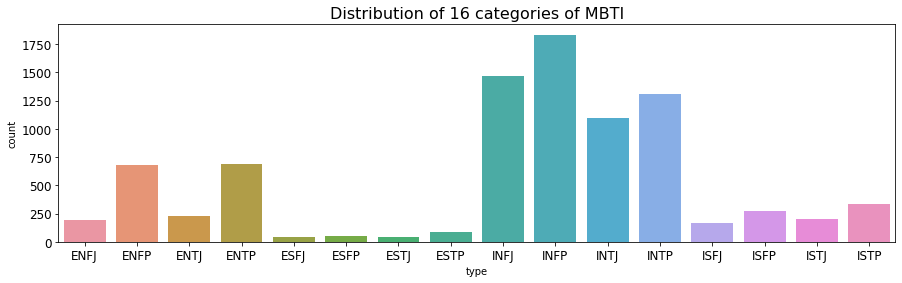

In [8]:
#Ploting it in a graph for better visulization
dims1 = (15.0, 4.0)
fig, ax = plt.subplots(figsize=dims1)
coolwarm = sns.color_palette("coolwarm", 12)
sns.set_palette(coolwarm)
sns.countplot(x="type", data=df, \
              order=["ENFJ","ENFP","ENTJ","ENTP","ESFJ","ESFP","ESTJ","ESTP",\
                     "INFJ","INFP","INTJ","INTP","ISFJ","ISFP","ISTJ","ISTP"])
plt.title("Distribution of 16 categories of MBTI", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

Exploring the dataset with individual axes of personalities ie., Introversion-Extroversion, Intitution-Sensing and so on. 

In [9]:
df['I-E']=df['type'].map(lambda x: 'Introversion' if x[0]=='I' else 'Extroversion')
df['N-S']=df['type'].map(lambda x: 'Intuition' if x[1]=='N' else 'Sensing')
df['T-F']=df['type'].map(lambda x: 'Thinking' if x[2]=='T' else 'Feeling')
df['J-P']=df['type'].map(lambda x: 'Judging' if x[3]=='J' else 'Perceiving')
df.head()

,type,posts,I-E,N-S,T-F,J-P
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,Introversion,Intuition,Feeling,Judging
1,ENTP,'I'm finding the lack of me in these posts ver...,Extroversion,Intuition,Thinking,Perceiving
2,INTP,'Good one _____ https://www.youtube.com/wat...,Introversion,Intuition,Thinking,Perceiving
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",Introversion,Intuition,Thinking,Judging
4,ENTJ,'You're fired.|||That's another silly misconce...,Extroversion,Intuition,Thinking,Judging


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 <a list of 9 Text yticklabel objects>)

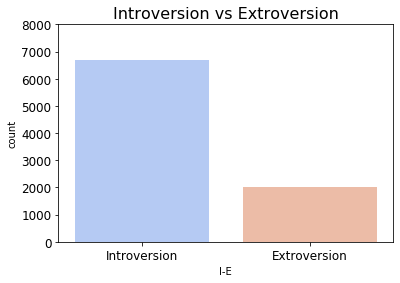

In [10]:
#IE = sns.xkcd_palette(['red','orange'])
#sns.set_palette(IE)
IE = sns.color_palette("coolwarm", 2)
sns.set_palette(IE)
sns.countplot(x='I-E', data=df, order = (['Introversion','Extroversion']))
plt.title("Introversion vs Extroversion", fontsize=16)
plt.ylim(0,8000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

The graph above shows the dataset is skewed more over Introversion than Extroversion personality types. 

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 <a list of 9 Text yticklabel objects>)

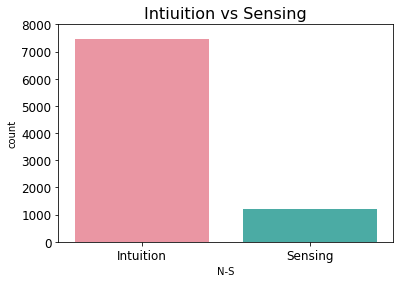

In [11]:
NS = sns.color_palette("coolwarm", 1)
sns.set_palette(NS)
sns.countplot(x='N-S', data=df, order = (['Intuition','Sensing']))
plt.title("Intiuition vs Sensing", fontsize=16)
plt.ylim(0,8000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

The graph above shows the dataset is skewed more over Intution than Sensing personality types. 

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 <a list of 9 Text yticklabel objects>)

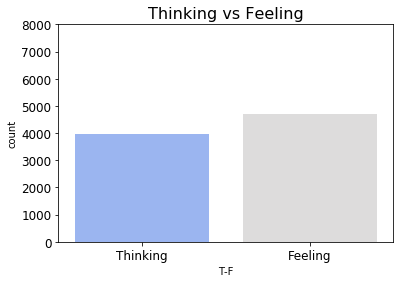

In [12]:
TF = sns.color_palette("coolwarm", 3)
sns.set_palette(TF)
sns.countplot(x='T-F', data=df, order = (['Thinking','Feeling']))
plt.title("Thinking vs Feeling", fontsize=16)
plt.ylim(0,8000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

The graph above shows the dataset is almost balanced but slightly skewed more over Feeling than Thinking

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 <a list of 9 Text yticklabel objects>)

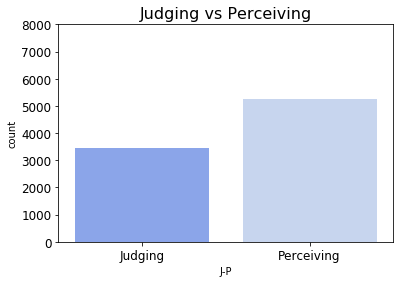

In [13]:
JP = sns.color_palette("coolwarm", 4)
sns.set_palette(JP)
sns.countplot(x='J-P', data=df, order = (['Judging','Perceiving']))
plt.title("Judging vs Perceiving", fontsize=16)
plt.ylim(0,8000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

The graph above shows the dataset is skewed more over Perceiving than Judging personality types. 

From the above exploratory data analysis performed on the dataset, it appears the dataset is highly imbalanced and may result in overfitting/underfitting problem of the majority/minority classes. In order to solve this problem, resampling method was applied to balance the dataset. Downsampling of majority class and Up-sampling of minority class has been implemented to balance the dataset. 

ISTP    500
INTP    500
INFJ    500
ENTP    500
ESFP    500
ESFJ    500
ISTJ    500
INTJ    500
INFP    500
ENTJ    500
ESTP    500
ISFP    500
ENFP    500
ESTJ    500
ISFJ    500
ENFJ    500
Name: type, dtype: int64


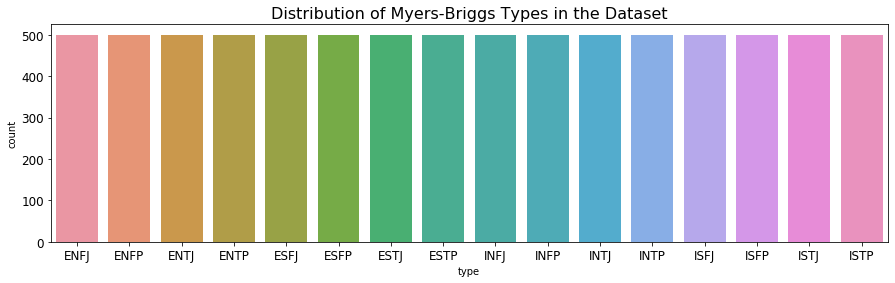

In [14]:
#Applying Resampling method to balance the dataset. 

unique_cat = np.unique(df.type)

col = ['type', 'posts']
df1 = pd.DataFrame(columns = col)

for u in unique_cat:
    temp_1 = df[df.type == u]
    temp_2 = resample(temp_1, n_samples=500)
    df1 = pd.concat([df1, temp_2])

print(df1['type'].value_counts())

dims1 = (15.0, 4.0)
fig, ax = plt.subplots(figsize=dims1)
coolwarm = sns.color_palette("coolwarm", 12)
sns.set_palette(coolwarm)
sns.countplot(x="type", data=df1, \
              order=["ENFJ","ENFP","ENTJ","ENTP","ESFJ","ESFP","ESTJ","ESTP",\
                     "INFJ","INFP","INTJ","INTP","ISFJ","ISFP","ISTJ","ISTP"])
plt.title("Distribution of Myers-Briggs Types in the Dataset", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

# Data Cleaning

In [15]:
# Function to convert all text into lower case, remove seperaters, hyperlinks, puntuations, numbers and stop words
# within the text along with lemmatizing the text.

wn = nltk.WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')
# The personality type names also appeared in the tweets, adding them to stopwords 
#collection to avoid overfitting probelem
types = ['infj', 'entp', 'intp', 'intj', 'entj', 'enfj', 'infp', 'enfp', 'isfp', \
         'istp', 'isfj', 'istj', 'estp', 'esfp', 'estj', 'esfj']
for type in types:
    stopwords.append(type)

def data_clean(text):
    text = text.lower()
    text = text.replace('|||', ' ') #removing the pipes seperating each tweet.                                  
    text = re.sub(r'\bhttps?:\/\/.*?[\r\n]*? ', '', text, flags=re.MULTILINE)  # remove hyperlinks
    text = text.translate(str.maketrans('', '', string.punctuation)) #remove punctuation
    text = re.sub('\w*\d\w*', '', text) # remove numbers
    tokens = re.split('\W+',text) 
    text = [wn.lemmatize(word,pos='v') for word in tokens if word not in stopwords]
    text = [wn.lemmatize(word) for word in text if word not in stopwords] # round 2 of lemmatization to convert plurals
    return text


In [16]:
#Applying clean function on all the posts in the dataset
df1['posts'] = df1['posts'].apply(lambda x: data_clean(x))

In [17]:
#Saving a copy through pickle function of tokened posts for future reference.
df1.to_pickle("tokened_posts.pkl")

In [18]:
# remove low frequency words
# compute global word frequency
c = Counter(chain.from_iterable(df1['posts']))
# filter, join, and re-assign
#words with frequency less than 50 in the document are removed from the dataset.
df1['posts'] = [' '.join([j for j in i if c[j] > 50]) for i in df1['posts']]

In [19]:
# Creating document term matrix using tfidf vectorizer 
cv = TfidfVectorizer(ngram_range=(1,2),max_features=1000)
X = cv.fit_transform(df1.posts)
dtm = pd.DataFrame(X.toarray(),columns=cv.get_feature_names())


In [20]:
#Displaying the final cleaned document term matrix
dtm

,ability,able,absolutely,accept,account,accurate,across,act,action,actually,...,year old,yep,yes,yet,youd,youll,young,younger,youre,youve
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025968,0.000000,0.033525,...,0.0,0.0,0.016992,0.000000,0.000000,0.032639,0.000000,0.033814,0.050403,0.000000
1,0.036672,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034393,0.035487,...,0.0,0.0,0.071947,0.027254,0.000000,0.000000,0.035351,0.000000,0.035568,0.059978
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047770,0.000000,0.000000,0.182514,...,0.0,0.0,0.115635,0.035043,0.000000,0.000000,0.000000,0.000000,0.114332,0.038559
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034577,0.025582,0.000000,0.033027,...,0.0,0.0,0.016740,0.000000,0.000000,0.032154,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.037818,0.000000,0.000000,0.000000,0.000000,0.000000,0.019814,...,0.0,0.0,0.000000,0.060869,0.043874,0.000000,0.000000,0.000000,0.019860,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.000000,0.123372,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054645,...,0.0,0.0,0.000000,0.041967,0.000000,0.000000,0.000000,0.000000,0.027385,0.000000
7996,0.000000,0.000000,0.000000,0.000000,0.000000,0.039643,0.000000,0.028967,0.000000,0.037397,...,0.0,0.0,0.037910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7997,0.000000,0.000000,0.069351,0.074339,0.046366,0.041288,0.000000,0.000000,0.000000,0.019475,...,0.0,0.0,0.000000,0.000000,0.000000,0.075840,0.000000,0.000000,0.019519,0.000000
7998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.030183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Evaluating the Accuarcy Scores of Machine Learning Algorithms on 16 class types

In [21]:
x=dtm
y=df1.type
train, test, train_lbl, test_lbl = train_test_split( x, y, test_size=0.2)

#Accuracy without PCA
print("Accuracy Scores of Machine Learning Models without PCA")
#Naive Bayes
clf = GaussianNB().fit(train,train_lbl)
print("Naive bayes:", clf.score(test,test_lbl))

#SVM
clf1 = LinearSVC().fit(train,train_lbl)
print("SVM:",clf1.score(test,test_lbl))
      
#KNN
clf2 = KNeighborsClassifier(n_neighbors = 1).fit(train,train_lbl)
print("KNN:",clf2.score(test,test_lbl))
      
#Neural Network
clf3 = MLPClassifier(random_state=1, max_iter=300).fit(train, train_lbl)
print("Neural Network:",clf3.score(test,test_lbl))

Accuracy Scores of Machine Learning Models without PCA
Naive bayes: 0.57125
SVM: 0.77
KNN: 0.743125
Neural Network: 0.80625


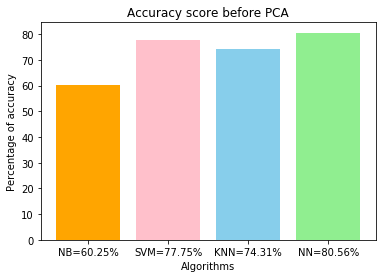

In [22]:
#Graph to view the accuracy scores
data = [60.25,77.75,74.31,80.56]
labels = ['NB=60.25%','SVM=77.75%','KNN=74.31%','NN=80.56%']
plt.xticks(range(len(data)),labels)
plt.xlabel('Algorithms')
plt.ylabel('Percentage of accuracy')
plt.title('Accuracy score before PCA')
plt.bar(range(len(data)), data, color =['orange','pink','skyblue','lightgreen'])
plt.show()

# Feature Extraction using PCA

In [23]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train)
# Apply transform to both the training set and the test set.
train = scaler.transform(train)
test = scaler.transform(test)

In [24]:
# Make an instance of the Model
pca = PCA(.90)
pca.fit(train)
train_data = pca.transform(train)
test_data = pca.transform(test)
print("PCA explained ratio:",pca.explained_variance_ratio_.sum())
print("No of components post PCA:",pca.n_components_)

PCA explained ratio: 0.9003452853326889
No of components post PCA: 658


# Reviewing the performance of 16 type classification post PCA

In [25]:
#Accuracy after PCA
print("Accuracy Scores of Machine Learning Models after PCA")
#Naive Bayes
clf = GaussianNB().fit(train_data,train_lbl)
print("Naive bayes:", clf.score(test_data,test_lbl))

#SVM
clf1 = LinearSVC().fit(train_data,train_lbl)
print("SVM:",clf1.score(test_data,test_lbl))
      
#KNN
clf2 = KNeighborsClassifier(n_neighbors = 1).fit(train_data,train_lbl)
print("KNN:",clf2.score(test_data,test_lbl))
      
#Neural Network
clf3 = MLPClassifier(random_state=1, max_iter=300).fit(train_data, train_lbl)
print("Neural Network:",clf3.score(test_data,test_lbl))

Accuracy Scores of Machine Learning Models after PCA
Naive bayes: 0.488125


C:\Users\pooja\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVM: 0.761875
KNN: 0.735625
Neural Network: 0.79375


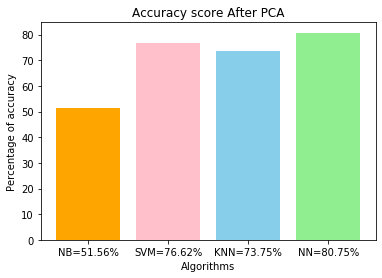

In [26]:
#Graph to view the accuracy scores
data = [51.56,76.62,73.75,80.75]
labels = ['NB=51.56%','SVM=76.62%','KNN=73.75%','NN=80.75%']
plt.xticks(range(len(data)),labels)
plt.xlabel('Algorithms')
plt.ylabel('Percentage of accuracy')
plt.title('Accuracy score After PCA')
plt.bar(range(len(data)), data, color =['orange','pink','skyblue','lightgreen'])
plt.show()

# Evaluating the performance of models with 2 pair class types

In [27]:
#Evaluating the performace before PCA on 2 pair class types
mbti_classes = ['I-E','N-S','T-F','J-P']
classifiers =['Naive bayes','SVM','KNN','Neural Network']
x=dtm
for i in mbti_classes:
    y=df1[i]
    train, test, train_lbl, test_lbl = train_test_split( x, y, test_size=0.2)
    print("Class Type:",i,)
    #Naive Bayes
    clf1 = GaussianNB().fit(train,train_lbl)
    acc1= clf1.score(test,test_lbl)
    print("Naive Bayes:",acc1)

    #SVM
    clf2 = LinearSVC().fit(train,train_lbl)
    acc2=clf2.score(test,test_lbl)
    print("SVM:",acc2)
      
    #KNN
    clf3 = KNeighborsClassifier(n_neighbors = 1).fit(train,train_lbl)
    acc3=clf3.score(test,test_lbl)
    print("KNN:",acc3)                                                    
      
    #Neural Network
    clf4 = MLPClassifier(random_state=1, max_iter=300).fit(train, train_lbl)
    acc4 =clf4.score(test,test_lbl)
    print("Neural Network:",acc4,"\n")
        

Class Type: I-E
Naive Bayes: 0.755625
SVM: 0.825625
KNN: 0.8825
Neural Network: 0.899375 

Class Type: N-S
Naive Bayes: 0.776875
SVM: 0.866875
KNN: 0.910625
Neural Network: 0.930625 

Class Type: T-F
Naive Bayes: 0.79125
SVM: 0.86
KNN: 0.860625
Neural Network: 0.91625 

Class Type: J-P
Naive Bayes: 0.7275
SVM: 0.803125
KNN: 0.8825
Neural Network: 0.893125 



# Classifier Models after PCA on 2 pair class types

In [28]:
#NAIVE BAYES ALGORITHM
#from sklearn.preprocessing import Normalizer
#train_img = Normalizer().fit_transform(train_img)
print("Naive Bayes Classifier")
x=dtm
mbti_classes = ['I-E','N-S','T-F','J-P']
for i in mbti_classes:
    y=df1[i]
    train_data, test_data, train_lbl, test_lbl = train_test_split( x, y, test_size=0.2)
    clf = GaussianNB().fit(train_data,train_lbl)
    predicted=clf.predict(test_data)
    #print("Accuracy:",clf.score(predicted,test_lbl))
    print("Class Type:",i)
    print(classification_report(test_lbl,predicted))
    print("Confusion Matrix:\n",confusion_matrix(test_lbl,predicted),"\n")
   

Naive Bayes Classifier
Class Type: I-E
              precision    recall  f1-score   support

Extroversion       0.75      0.73      0.74       788
Introversion       0.75      0.76      0.75       812

    accuracy                           0.75      1600
   macro avg       0.75      0.75      0.75      1600
weighted avg       0.75      0.75      0.75      1600

Confusion Matrix:
 [[577 211]
 [192 620]] 

Class Type: N-S
              precision    recall  f1-score   support

   Intuition       0.77      0.81      0.79       802
     Sensing       0.80      0.76      0.78       798

    accuracy                           0.78      1600
   macro avg       0.78      0.78      0.78      1600
weighted avg       0.78      0.78      0.78      1600

Confusion Matrix:
 [[648 154]
 [191 607]] 

Class Type: T-F
              precision    recall  f1-score   support

     Feeling       0.80      0.76      0.78       827
    Thinking       0.76      0.80      0.78       773

    accuracy           

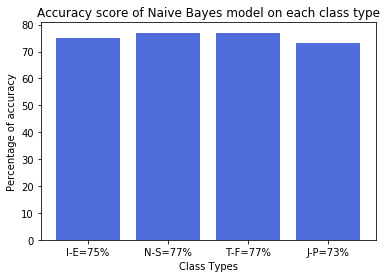

In [29]:
data = [75,77,77,73]
labels = ['I-E=75%','N-S=77%','T-F=77%','J-P=73%']
plt.xticks(range(len(data)),labels)
plt.xlabel('Class Types')
plt.ylabel('Percentage of accuracy')
plt.title('Accuracy score of Naive Bayes model on each class type')
plt.bar(range(len(data)), data)
plt.show()

In [30]:
#Support Vector Machine

print("Support Vector Machine")
x=dtm
mbti_classes = ['I-E','N-S','T-F','J-P']
for i in mbti_classes:
    y=df1[i]
    train_data, test_data, train_lbl, test_lbl = train_test_split( x, y, test_size=0.2)
    clf1 = LinearSVC().fit(train_data,train_lbl)
    predicted1=clf1.predict(test_data)
    #print("Accuracy:",clf.score(predicted,test_lbl))
    print("Class Type:",i)
    print(classification_report(test_lbl,predicted1))
    print("Confusion Matrix:\n",confusion_matrix(test_lbl,predicted1),"\n")


Support Vector Machine
Class Type: I-E
              precision    recall  f1-score   support

Extroversion       0.80      0.86      0.83       785
Introversion       0.86      0.80      0.83       815

    accuracy                           0.83      1600
   macro avg       0.83      0.83      0.83      1600
weighted avg       0.83      0.83      0.83      1600

Confusion Matrix:
 [[678 107]
 [166 649]] 

Class Type: N-S
              precision    recall  f1-score   support

   Intuition       0.88      0.83      0.85       797
     Sensing       0.84      0.89      0.86       803

    accuracy                           0.86      1600
   macro avg       0.86      0.86      0.86      1600
weighted avg       0.86      0.86      0.86      1600

Confusion Matrix:
 [[661 136]
 [ 92 711]] 

Class Type: T-F
              precision    recall  f1-score   support

     Feeling       0.88      0.86      0.87       816
    Thinking       0.86      0.88      0.87       784

    accuracy           

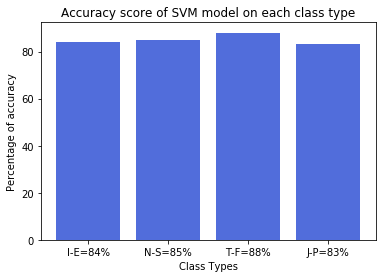

In [31]:
data = [84,85,88,83]
labels = ['I-E=84%','N-S=85%','T-F=88%','J-P=83%']
plt.xticks(range(len(data)),labels)
plt.xlabel('Class Types')
plt.ylabel('Percentage of accuracy')
plt.title('Accuracy score of SVM model on each class type')
plt.bar(range(len(data)), data)
plt.show()

In [32]:
print("K-Nearest Neighbour")
x=dtm
mbti_classes = ['I-E','N-S','T-F','J-P']
for i in mbti_classes:
    y=df1[i]
    train_data, test_data, train_lbl, test_lbl = train_test_split( x, y, test_size=0.2)
    clf2 = KNeighborsClassifier(n_neighbors=2).fit(train_data,train_lbl)
    predicted2=clf2.predict(test_data)
    #print("Accuracy:",clf.score(predicted,test_lbl))
    print("Class Type:",i)
    print(classification_report(test_lbl,predicted2))
    print("Confusion Matrix:\n",confusion_matrix(test_lbl,predicted2),"\n")



K-Nearest Neighbour
Class Type: I-E
              precision    recall  f1-score   support

Extroversion       0.75      0.92      0.82       783
Introversion       0.90      0.70      0.79       817

    accuracy                           0.81      1600
   macro avg       0.82      0.81      0.81      1600
weighted avg       0.83      0.81      0.81      1600

Confusion Matrix:
 [[722  61]
 [247 570]] 

Class Type: N-S
              precision    recall  f1-score   support

   Intuition       0.84      0.92      0.88       799
     Sensing       0.91      0.83      0.87       801

    accuracy                           0.88      1600
   macro avg       0.88      0.88      0.88      1600
weighted avg       0.88      0.88      0.88      1600

Confusion Matrix:
 [[735  64]
 [135 666]] 

Class Type: T-F
              precision    recall  f1-score   support

     Feeling       0.78      0.94      0.85       801
    Thinking       0.92      0.73      0.81       799

    accuracy              

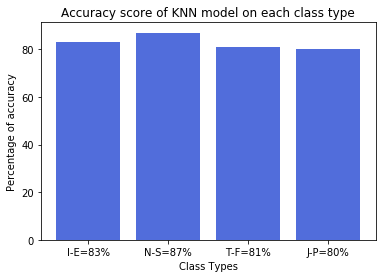

In [33]:
data = [83,87,81,80]
labels = ['I-E=83%','N-S=87%','T-F=81%','J-P=80%']
plt.xticks(range(len(data)),labels)
plt.xlabel('Class Types')
plt.ylabel('Percentage of accuracy')
plt.title('Accuracy score of KNN model on each class type')
plt.bar(range(len(data)), data)
plt.show()

In [ ]:
print("Neural Network")
x=dtm
mbti_classes = ['I-E','N-S','T-F','J-P']
for i in mbti_classes:
    y=df1[i]
    train_data, test_data, train_lbl, test_lbl = train_test_split( x, y, test_size=0.2)
    clf3 = MLPClassifier().fit(train_data,train_lbl)
    predicted3=clf3.predict(test_data)
    #print("Accuracy:",clf.score(predicted,test_lbl))
    print("Class Type:",i)
    print(classification_report(test_lbl,predicted3))
    print("Confusion Matrix:\n",confusion_matrix(test_lbl,predicted3),"\n")



Neural Network


In [ ]:
data = [91,93,92,90]
labels = ['I-E=91%','N-S=93%','T-F=92%','J-P=90%']
plt.xticks(range(len(data)),labels)
plt.xlabel('Class Types')
plt.ylabel('Percentage of accuracy')
plt.title('Accuracy score of Neural Network model on each class type')
plt.bar(range(len(data)), data)
plt.show()

In [ ]:
N = 4
IE = (75,84,83,91)
NS = (77,85,87,93)
TF = (77,88,81,92)
JP = (73,83,80,90)
ind = np.arange(N) 
width = 0.10       
plt.bar(ind,IE, width, label='IE')
plt.bar(ind + width, NS, width,
    label='NS')
plt.bar(ind+width+width,TF,width,label='TF')
plt.bar(ind+width+width+width,JP,width,label='JP')
plt.ylabel('Class Types')
plt.title('Accuracy Scores of Class Types for each classifier')

plt.xticks(ind + width / 4, ('Naive Bayes', 'SVM', 'KNN', 'Neural network'))
plt.legend(loc='upper center')
plt.rcParams['figure.figsize']=(10,6)
plt.show()